In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Saving
import pickle

# Ignore Warnings
import warnings
#warnings.filterwarnings(\"ignore\")


# Task 1 Data Exploration

In [208]:
# Load the dataset
df = pd.read_excel("Processed_Flipdata.xlsx")

In [210]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB
None


In [212]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [214]:
# find the number of rows and columns
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 541 rows and 12 columns.


In [216]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [218]:
# Display column names and data types
print("\nColumn Names and Data Types:")
print(df.dtypes)


Column Names and Data Types:
Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize              int64
dtype: object


# Convert Rear Camera & Front Camera to Numeric

In [220]:
# defining a function to extract the numeric value from front camera and rear camera and converting it integer dtype:

def extract_numeric(value):
    numeric_part = re.search(r'\d+', value).group()
    return int(numeric_part)

In [222]:
print(df.columns)

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize'],
      dtype='object')


In [224]:
df['Rear Camera'] = df['Rear Camera'].apply(extract_numeric)
df['Front Camera'] = df['Front Camera'].apply(extract_numeric)
df

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50,12,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5,2,0,12.70,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50,8,0,16.76,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50,32,0,16.26,"Exynos 1380, Octa Core",38999


In [226]:
df = df.rename(columns={'Battery_':'Battery','Rear Camera':'Rear_camera_mp','Front Camera':'Front_Camera_mp','Processor_':'Processor','Prize':'Price'})
df

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor,Price
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50,12,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5,2,0,12.70,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50,8,0,16.76,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50,32,0,16.26,"Exynos 1380, Octa Core",38999


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            541 non-null    object 
 1   Colour           541 non-null    object 
 2   Memory           541 non-null    int64  
 3   RAM              541 non-null    int64  
 4   Battery          541 non-null    int64  
 5   Rear_camera_mp   541 non-null    int64  
 6   Front_Camera_mp  541 non-null    int64  
 7   AI Lens          541 non-null    int64  
 8   Mobile Height    541 non-null    float64
 9   Processor        541 non-null    object 
 10  Price            541 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 46.6+ KB


In [230]:
#  missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Model              0
Colour             0
Memory             0
RAM                0
Battery            0
Rear_camera_mp     0
Front_Camera_mp    0
AI Lens            0
Mobile Height      0
Processor          0
Price              0
dtype: int64


In [232]:
# statistics for numerical features
df.describe()

,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Price
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,46.110906,11.992606,0.062847,16.431201,16228.375231
std,60.600694,1.984923,780.148862,31.260416,9.053746,0.242911,2.523553,10793.588322
min,16.000000,2.000000,800.000000,0.000000,0.000000,0.000000,4.500000,920.000000
25%,64.000000,4.000000,5000.000000,13.000000,5.000000,0.000000,16.510000,9290.000000
50%,128.000000,6.000000,5000.000000,50.000000,8.000000,0.000000,16.710000,13499.000000
75%,128.000000,8.000000,5000.000000,50.000000,16.000000,0.000000,16.940000,19280.000000
max,256.000000,8.000000,7000.000000,200.000000,60.000000,1.000000,41.940000,80999.000000


# Identify Unique Values for Categorical Features

In [234]:
def get_categorical_features(data):
    categorical_columns = data.select_dtypes(include=['object', 'category'])
    return categorical_columns

categorical_features = get_categorical_features(df)
categorical_features.head()

,Model,Colour,Processor
0,Infinix SMART 7,Night Black,Unisoc Spreadtrum SC9863A1
1,Infinix SMART 7,Azure Blue,Unisoc Spreadtrum SC9863A1
2,MOTOROLA G32,Mineral Gray,Qualcomm Snapdragon 680
3,POCO C50,Royal Blue,Mediatek Helio A22
4,Infinix HOT 30i,Marigold,G37


In [236]:
for column in df.columns:
    if df[column].dtype =="object":
        print(column.upper(), ": ",df[column].nunique())
        print(df[column].value_counts())
        print("\n")
        print("*"*65)
        print("\n")

MODEL :  187
Model
vivo Y16                 9
realme C55               9
SAMSUNG Galaxy A14 5G    9
REDMI Note 12 Pro 5G     9
vivo T1 44W              8
                        ..
vivo Y1s                 1
OnePlus Nord             1
Micromax 3               1
vivo Y33s                1
OPPO A77                 1
Name: count, Length: 187, dtype: int64


*****************************************************************


COLOUR :  275
Colour
Yellow            12
Royal Blue         8
Power Black        8
Black              8
Midnight Black     7
                  ..
Polar Blue         1
Cosmic grey        1
Sea                1
Infinity Black     1
Sky Blue           1
Name: count, Length: 275, dtype: int64


*****************************************************************


PROCESSOR :  123
Processor
Qualcomm Snapdragon 680        33
Unisoc T612                    21
Mediatek Helio A22             19
Mediatek Dimensity 1080        18
Qualcomm Snapdragon 695 5G     17
                 

In [238]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 5


In [35]:
numerical_features

['Memory',
 'RAM',
 'Battery',
 'Rear_camera_mp',
 'Front_Camera_mp',
 'AI Lens',
 'Mobile Height',
 'Price']

In [240]:
discrete_feature

['Memory', 'RAM', 'Rear_camera_mp', 'Front_Camera_mp', 'AI Lens']

In [242]:
# Continous variable
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
continuous_feature

Continuous feature Count 3


['Battery', 'Mobile Height', 'Price']

# Histogram for Numerical Features

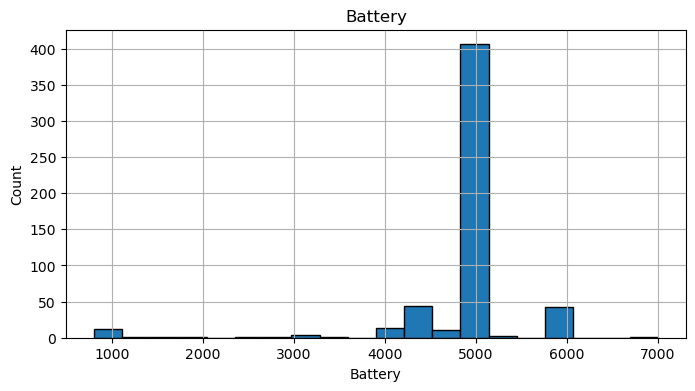

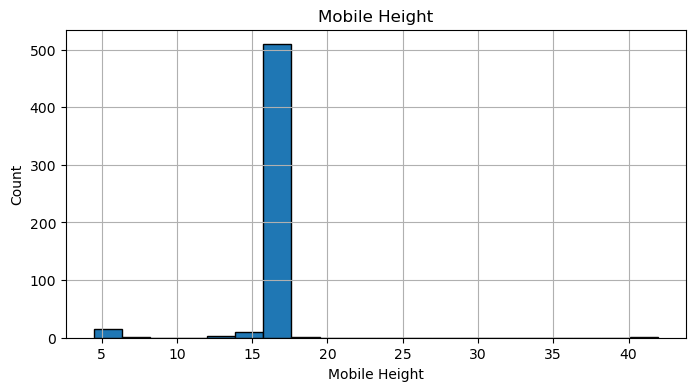

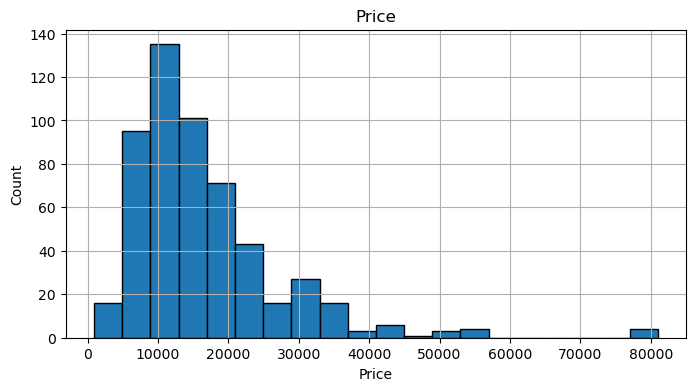

In [244]:
# Plot histograms 

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(figsize=(8, 4), bins=20, edgecolor="black")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

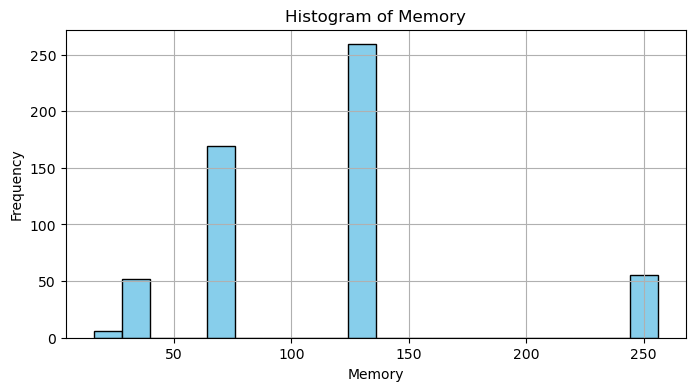

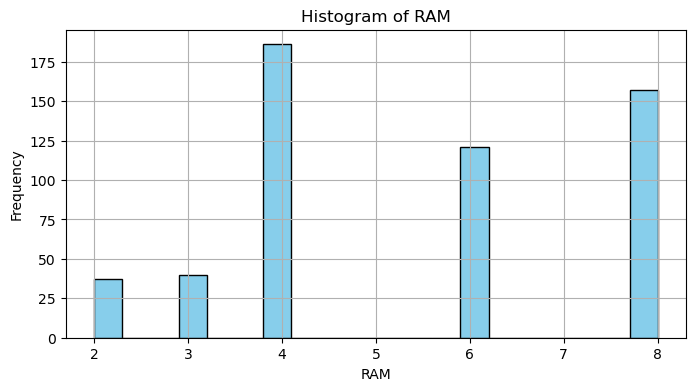

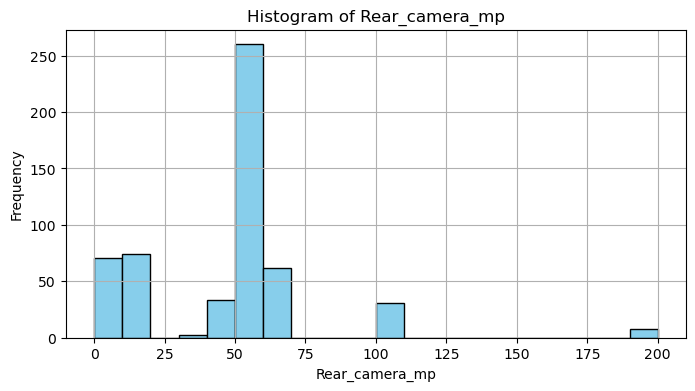

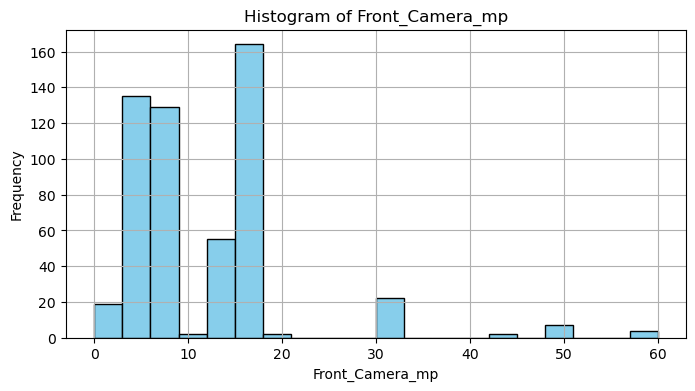

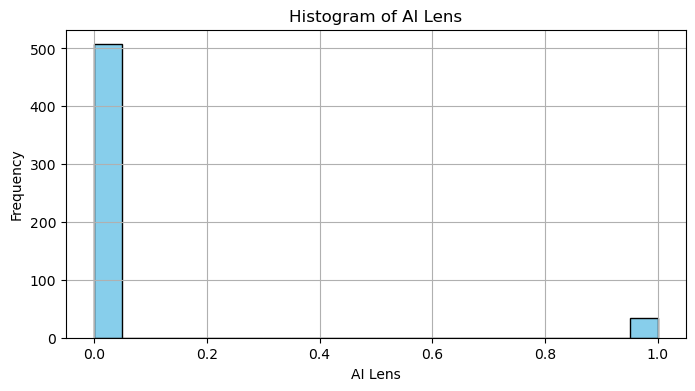

In [246]:
for col in discrete_feature:
        plt.figure(figsize=(8, 4))
        plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

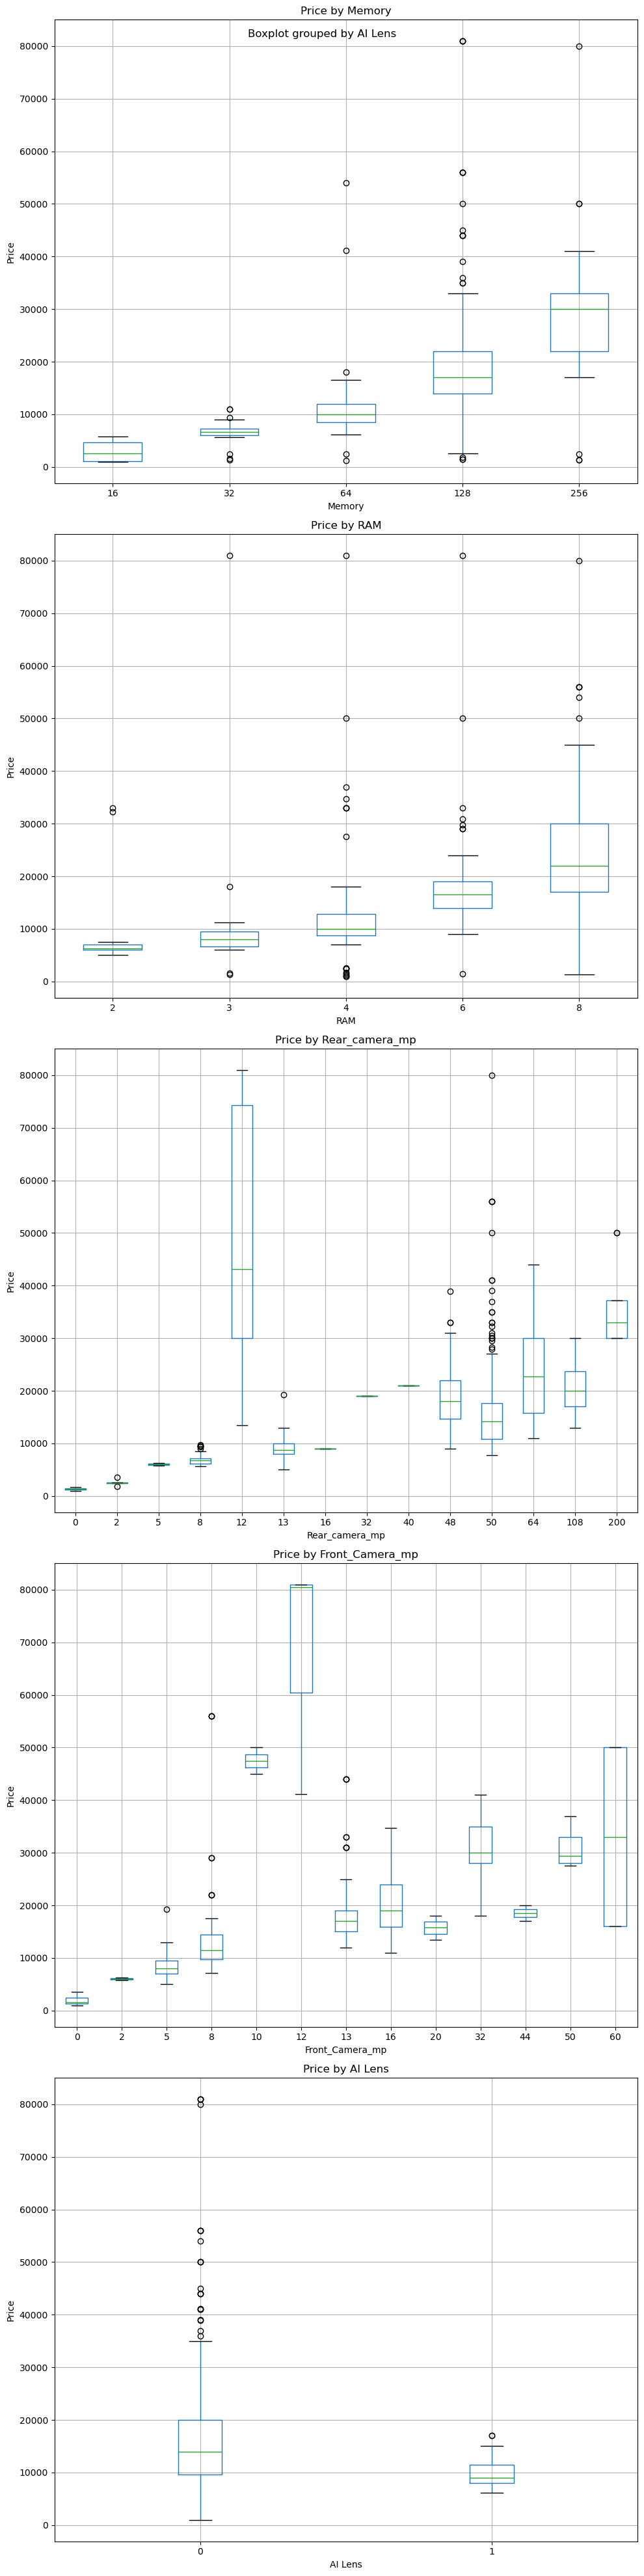

In [45]:
fig, axes = plt.subplots(nrows=len(discrete_feature), ncols=1, figsize=(10, 8*len(discrete_feature)))

for i, feature in enumerate(discrete_feature):
    ax = axes[i]
    df.boxplot(column='Price', by=feature, ax=ax)
    ax.set_title(f'Price by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')
    ax.grid(True)

plt.tight_layout()
plt.show()

# Correlation Heatmap

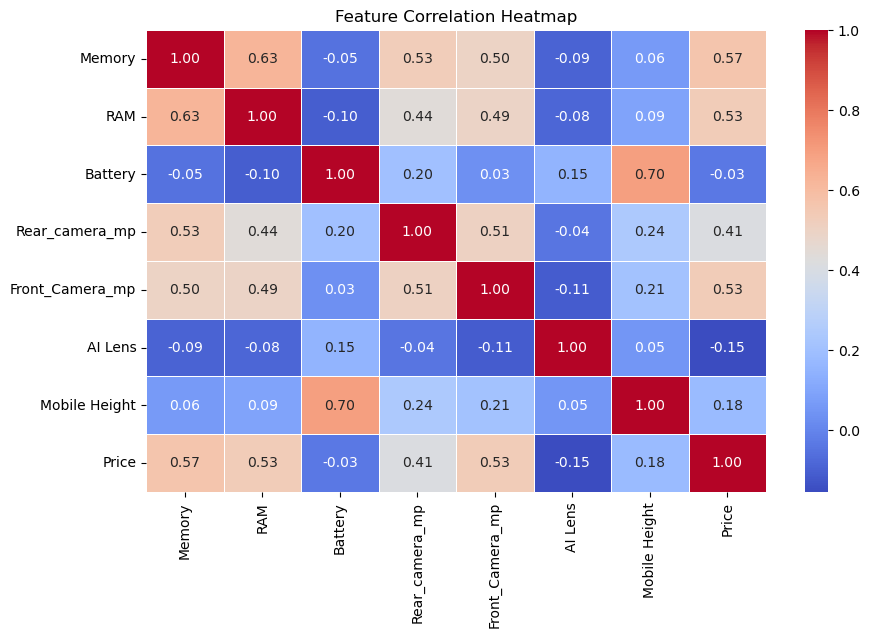

In [248]:
# numerical columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# find Duplicates

In [250]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 10


#  the relationship between continuous variable and dependent feature SalesPrice

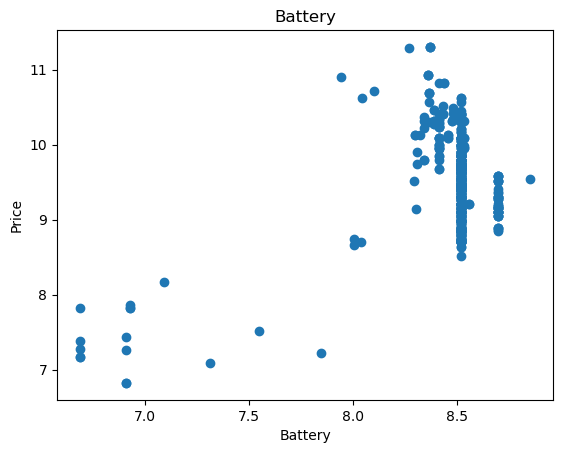

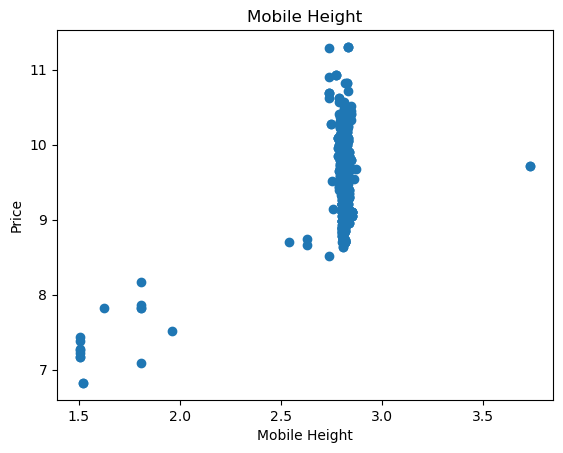

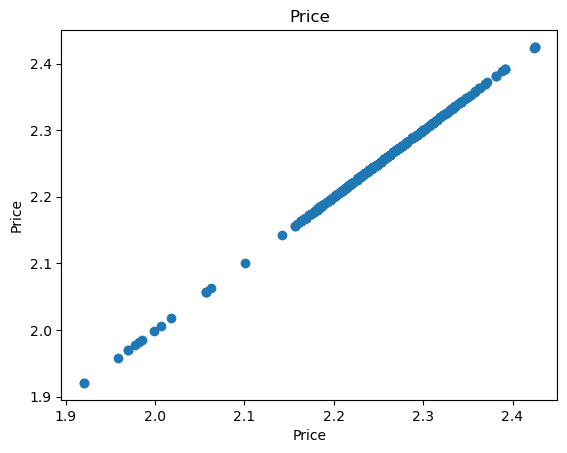

In [254]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Price']=np.log(data['Price'])
        plt.scatter(data[feature],data['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

# Outliers Using Box Plots

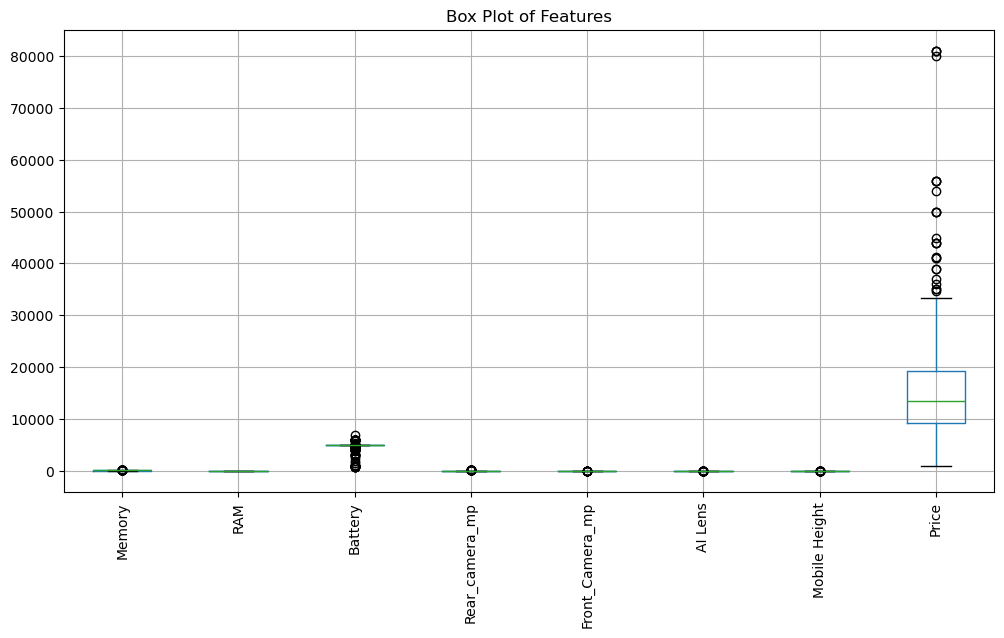

In [252]:
plt.figure(figsize=(12, 6))
df.boxplot(rot=90)
plt.title("Box Plot of Features")
plt.show()

# Task 2 Data Preprocessing

In [257]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Model              0
Colour             0
Memory             0
RAM                0
Battery            0
Rear_camera_mp     0
Front_Camera_mp    0
AI Lens            0
Mobile Height      0
Processor          0
Price              0
dtype: int64


In [ ]:
# we don't have any missing value in given dataset column .

# Handle Outliers

In [261]:
for col in df.select_dtypes(include=['number']).columns:
    df = df[(np.abs(df[col] - df[col].mean()) <= (3 * df[col].std()))]
    

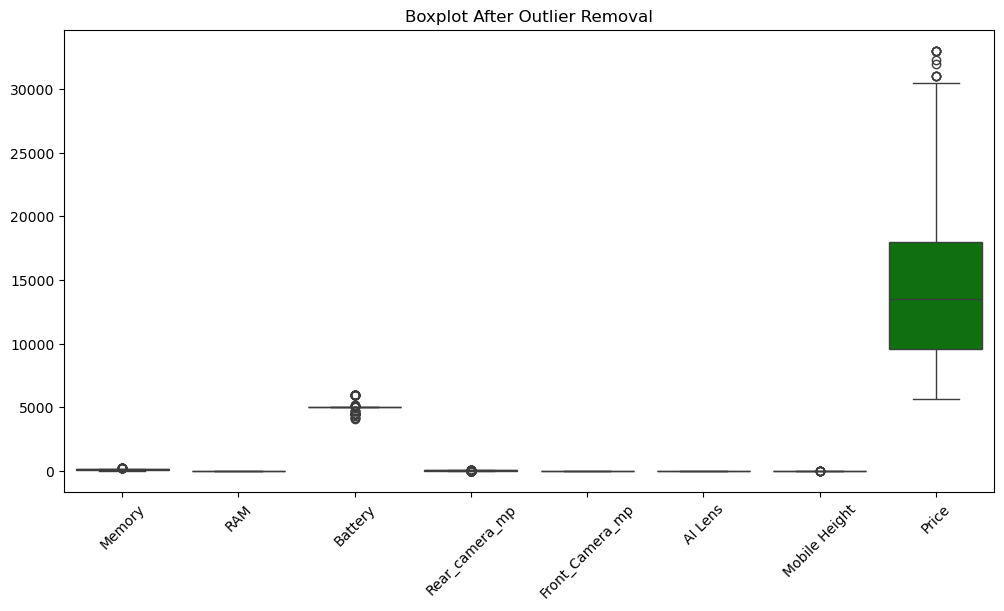

In [263]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['number']), color='green')
plt.xticks(rotation=45)
plt.title("Boxplot After Outlier Removal")
plt.show()

# Convert Categorical Variables using One-Hot Encoding

In [146]:
print(df.columns)

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery', 'Rear_camera_mp',
       'Front_Camera_mp', 'AI Lens', 'Mobile Height', 'Processor', 'Price'],
      dtype='object')


In [265]:
for col in df.select_dtypes(include=['number']).columns:
    df = df[(np.abs(df[col] - df[col].mean()) <= (3 * df[col].std()))]

In [283]:
#Encode Categorical Variables
categorical_cols = ['Model', 'Colour', 'Processor']  # Update with actual categorical columns
numerical_cols = ['Memory', 'RAM', 'Battery', 'Mobile Height', 'Rear_camera_mp', 'Front_Camera_mp']  # Update actual numerical features

In [285]:
#preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standardize numerical data
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-Hot Encode categorical data
    ]
)

In [287]:
# Apply transformations
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target variable

X_transformed = preprocessor.fit_transform(X)

In [289]:
print("\n--- Housing data Head ---")
print(df.head())


--- Housing data Head ---
                 Model        Colour  Memory  RAM  Battery  Rear_camera_mp  \
2         MOTOROLA G32  Mineral Gray     128    8     5000              50   
3             POCO C50    Royal Blue      32    2     5000               8   
14  SAMSUNG Galaxy F04    Opal Green      64    4     5000              13   
15            POCO C51    Royal Blue      64    4     5000               8   
17            POCO C51   Power Black      64    4     5000               8   

    Front_Camera_mp  AI Lens  Mobile Height                Processor  Price  
2                16        0          16.64  Qualcomm Snapdragon 680  11999  
3                 5        0          16.56       Mediatek Helio A22   5649  
14                5        0          16.51       Mediatek Helio P35   7299  
15                5        0          16.56                Helio G36   6999  
17                5        0          16.56                Helio G36   6999  


In [291]:
df['RAM'].unique()

array([8, 2, 4, 6, 3], dtype=int64)

In [293]:
df_clean_data = df.copy()

In [295]:
df_clean_data.to_csv('New_dataset.csv')

# Task 3 Feature Extraction

In [297]:
#Feature affeting the price:

df_clean_data.corr(numeric_only = True)['Price'].sort_values(ascending = False)

Price              1.000000
Memory             0.759118
RAM                0.743927
Front_Camera_mp    0.730771
Rear_camera_mp     0.596014
Mobile Height      0.232318
Battery           -0.355746
AI Lens                 NaN
Name: Price, dtype: float64

In [299]:
print(df_clean_data.columns)

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery', 'Rear_camera_mp',
       'Front_Camera_mp', 'AI Lens', 'Mobile Height', 'Processor', 'Price'],
      dtype='object')


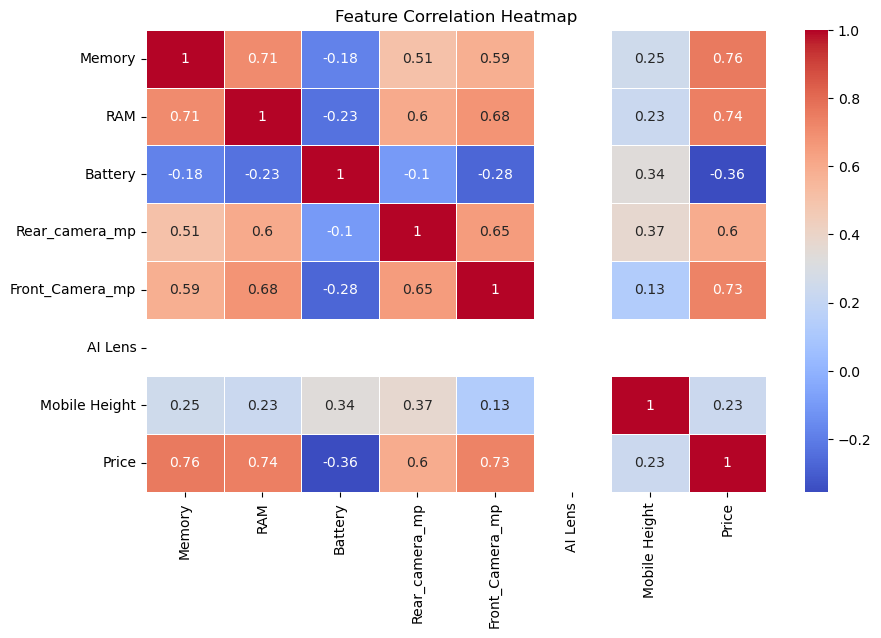

In [303]:
#Feature Selection (Correlation Analysis & SelectKBest)
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [305]:
# SelectKBest for Feature Extraction
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X_transformed, y)

In [313]:
# If using ColumnTransformer, get the transformed feature names
if hasattr(preprocessor, 'get_feature_names_out'):
    transformed_feature_names = preprocessor.get_feature_names_out(input_features=X.columns)
else:
    transformed_feature_names = X.columns  # Use original names if transformation doesn't change them

# Select features correctly
selected_feature_names = np.array(transformed_feature_names)[selector.get_support()]
print("\n Selected Features:", selected_feature_names)


 Selected Features: ['num__Memory' 'num__RAM' 'num__Battery' 'num__Rear_camera_mp'
 'num__Front_Camera_mp' 'cat__Model_POCO F5 5G'
 'cat__Model_SAMSUNG Galaxy A34 5G'
 'cat__Processor_Dimensity 1080, Octa Core '
 'cat__Processor_Mediatek Helio A22'
 'cat__Processor_Qualcomm Snapdragon 7+ Gen 2 (4nm)']


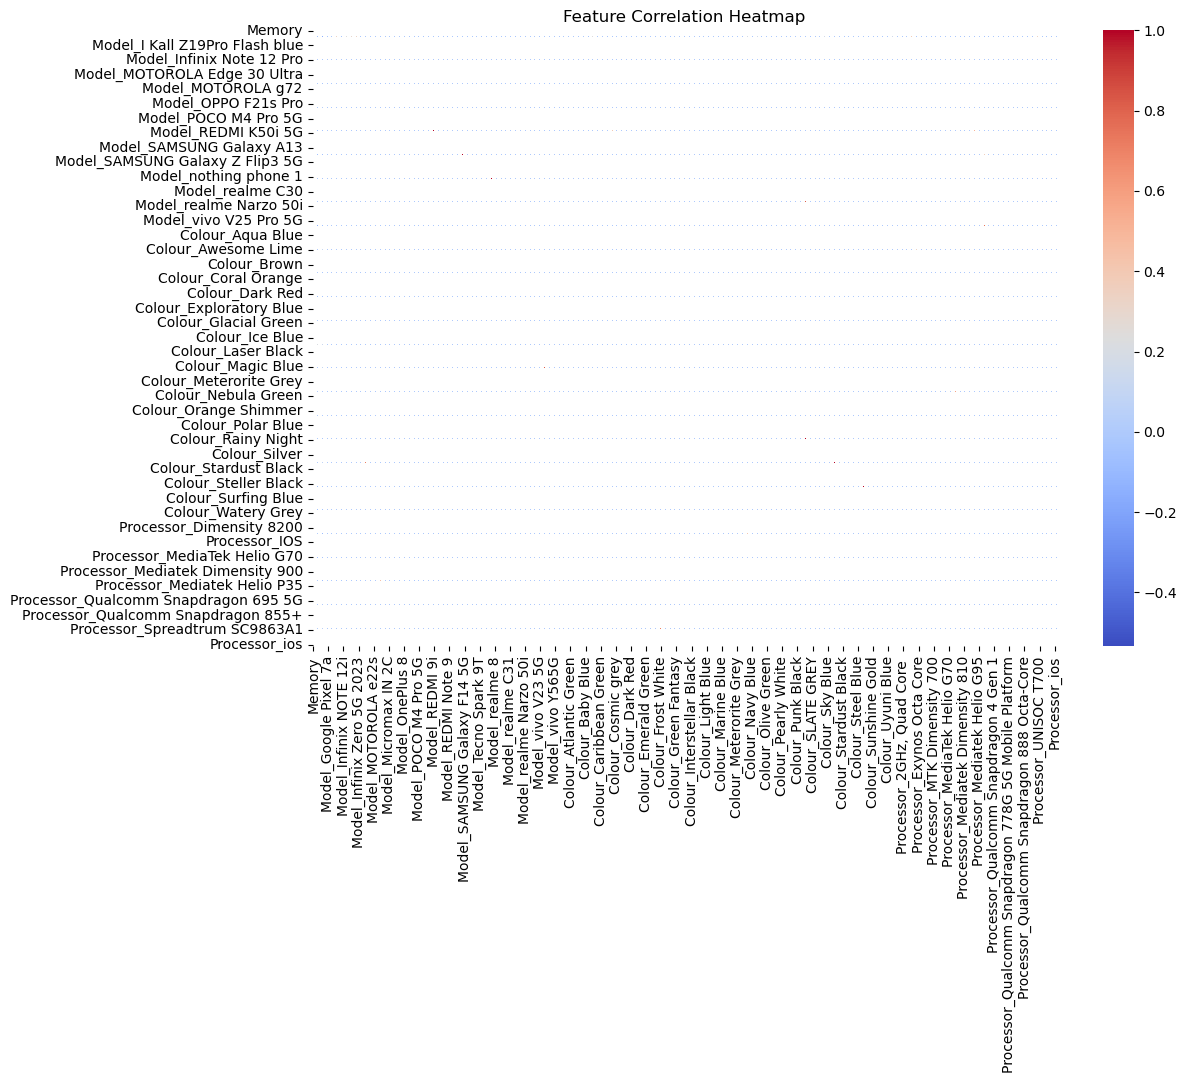

In [315]:
#Feature Selection using Correlation & SelectKBest
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Feature Selection Using Statistical Methods

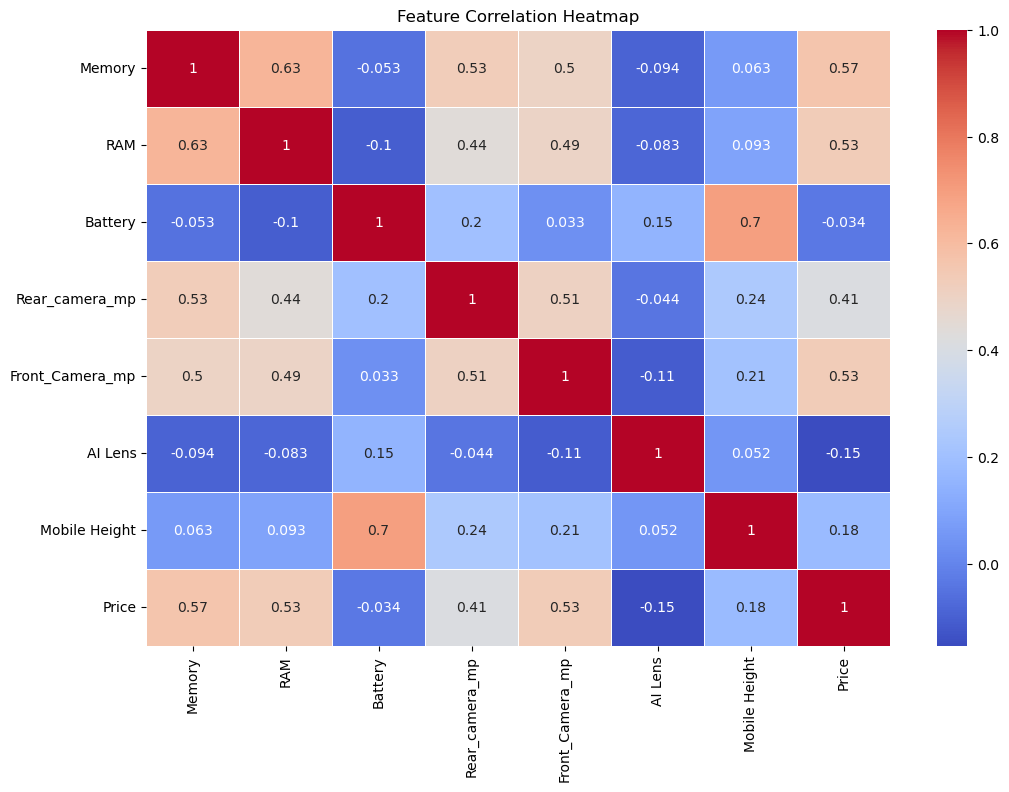

In [319]:
#Feature Extraction (Correlation & Statistical Selection)
numeric_data = df_encoded.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# task 4 Model Building

In [323]:
#Split Data into Train/Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

model_results = {}  # Store results for comparison

In [329]:
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    

# Task 5 Model Evaluation

In [331]:
# Evaluate each model
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results[name] = {"MAE": mae, "RMSE": rmse}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Display performance metrics
print("\nModel Performance:")
print(results_df)



Model Performance:
                           MAE         RMSE
Linear Regression  2297.827460  3139.601185
Decision Tree      1883.490185  3292.723237
Random Forest      1864.555767  2947.733533
Gradient Boosting  1995.983320  2949.943102


C:\Users\gurpr\AppData\Local\Temp\ipykernel_3712\2581214113.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['RMSE'], palette="viridis")


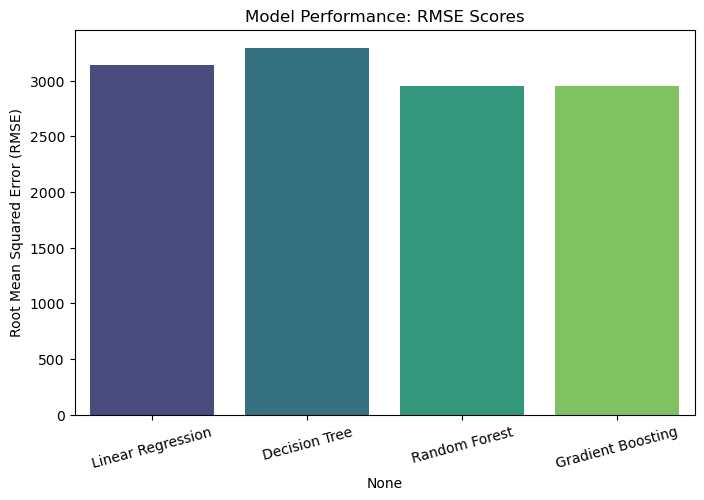

In [333]:
# Visualize RMSE for each model
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y=results_df['RMSE'], palette="viridis")
plt.title("Model Performance: RMSE Scores")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.xticks(rotation=15)
plt.show()

# Task 6 Feature Importance Analysis

In [335]:
best_model_name = min(model_results, key=lambda k: model_results[k]["MAE"])
best_model = models[best_model_name]
print(f"\n Best Model: {best_model_name} with MAE: {model_results[best_model_name]['MAE']:.2f}")


 Best Model: Random Forest with MAE: 1864.56


C:\Users\gurpr\AppData\Local\Temp\ipykernel_3712\2397695741.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="magma")


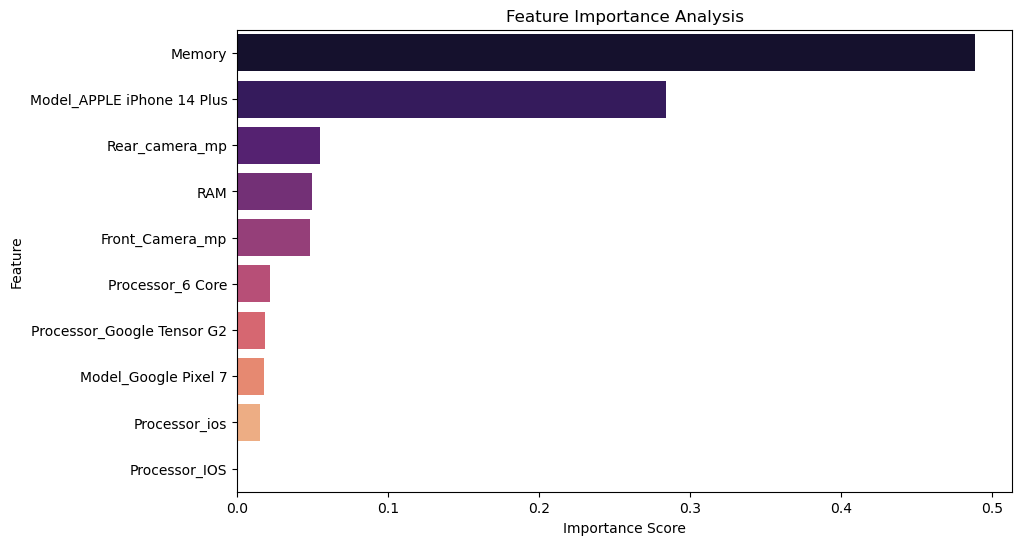


Top 10 Important Features:
Memory                        0.488630
Model_APPLE iPhone 14 Plus    0.283892
Rear_camera_mp                0.055198
RAM                           0.049805
Front_Camera_mp               0.048632
Processor_6 Core              0.021562
Processor_Google Tensor G2    0.018667
Model_Google Pixel 7          0.017946
Processor_ios                 0.015528
Processor_IOS                 0.000140
dtype: float64


In [341]:
# Train best model (Random Forest) on full training data
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# Extract feature importances
feature_importance = pd.Series(best_model.feature_importances_, index=selected_features).sort_values(ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="magma")
plt.title("Feature Importance Analysis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Display top 10 important features
print("\nTop 10 Important Features:")
print(feature_importance.head(10))

# Compare Selected Features from Both Methods

In [343]:
# Compare SelectKBest selected features with model's feature importance
selected_features_set = set(selected_features)  # Features from SelectKBest
important_features_set = set(feature_importance.head(10).index)  

# Find matching and differing features
matching_features = selected_features_set.intersection(important_features_set)
differences = selected_features_set.symmetric_difference(important_features_set)

print("\nMatching Features (Confirmed Important):")
print(matching_features)

print("\nDiffering Features (Potential Re-evaluation Needed):")
print(differences)



Matching Features (Confirmed Important):
{'Processor_ios', 'Memory', 'Model_Google Pixel 7', 'Processor_Google Tensor G2', 'Model_APPLE iPhone 14 Plus', 'RAM', 'Rear_camera_mp', 'Processor_6 Core', 'Front_Camera_mp', 'Processor_IOS'}

Differing Features (Potential Re-evaluation Needed):
set()


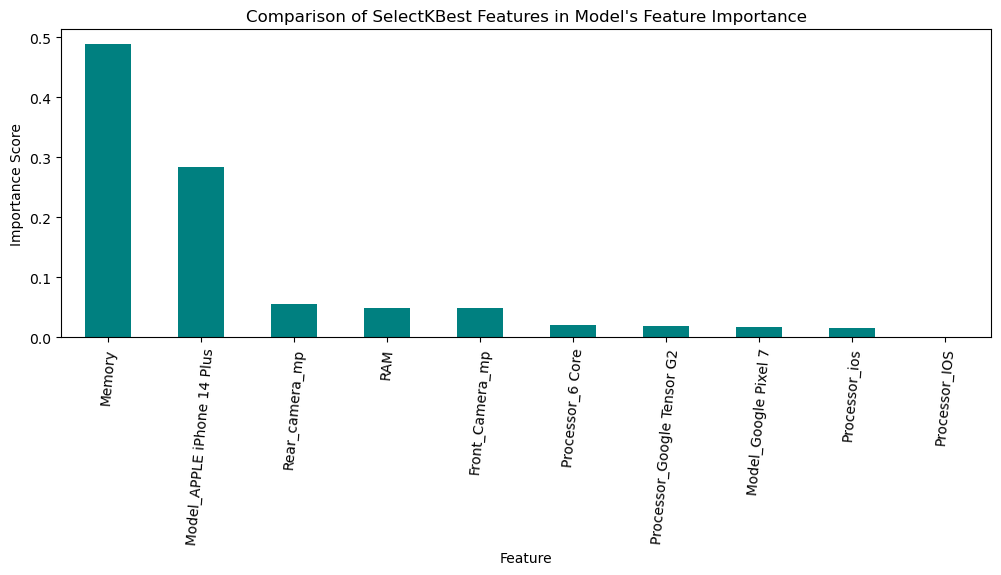

In [345]:
# bar chart to compare feature importance scores
plt.figure(figsize=(12,4))
feature_importance[selected_features].sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Comparison of SelectKBest Features in Model's Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.xticks(rotation=85)
plt.show()


In [347]:

model_filename = "mobile_price_prediction.pkl"

with open(model_filename, "wb") as file:
    pickle.dump(model, file)

print(f"Model saved as {model_filename}")

Model saved as mobile_price_prediction.pkl
